# Clustering y PCA sobre dataset de work-life balance

## Laboratorio 2022 - Tarea 4

### Grupo 27

Alexis Baladón, CI: 5.574.612-4

Ignacio Viscardi, CI: 5.066.666-2

Rafael Castelli, CI: 5.079.391-2

## Requisitos para reproducción de algoritmo

Para correr el presente notebook se deberán instalar las siguientes dependencias. Queda un script para su instalación automática.

In [ ]:
!pip install -r requirements.txt

## 2. Decisiones de diseño

La finalidad de esta sección consiste en introducir las principales decisiones de diseño tomadas para esta implementación de K-means.

### 2.1 Preprocesado

Primeramente, se elimina el nombre de la ciudad y país del conjunto de datos. Esto se hace debido a que ambos son atributos categóricos, por lo que sería necesaria una técnica como one-hot encoding para trabajar sobre ellos, pudiendo tener efectos indeseados al calcular la distancia euclídea (especialmente al normalizar los datos) debido a la maldición de la dimensionalidad. Más aún, no fueron considerados relevantes para medir el work-life balance.
Por otra parte, también se eliminó la columna 2021 y 2022 ya que estos atributos no parecen ser relevantes para el problema en cuestión, además de ser identificadores únicos de cada tupla.

En la seccion 3 (Experimentación) se mencionarán, cuando se considere adecuado, otras variables que fueron eliminadas del conjunto de datos para realizar los experimentos pertinentes.

### 2.2 Metaparametros

-- explicar los metaparametros

### 2.3 Metodo de inicialización
Se consideraron 2 métodos de inicialización para los centroides del algoritmo K-means. Uno de ellos realiza una selección aleatoria de K elementos del espacio de posibles elementos (se considera que un elemento x esta en el espacio de posibles elementos si para cada coordenada su valor es menor o igual que el maximo valor, en valor absoluto, que puede tomar dicha coordenada en el dataset provisto).

El otro método de inicialización considerado consiste en tomar k elementos del cluster (al azar) como centroides iniciales. Según lo visto en el teórico del curso, este método debería tener mejores propiedades de convergencia y 

#TODO: demostrar convergencia de ambos métodos

### 2.4 Manejo de cluster vacios en kmeans

exlicar que nos quedamos con el de menor distancia al centroide vacio y re asignamos

## 3 Experimentos

### 3.1 Sin normalizacion


Prerequisitos:

In [ ]:
import preprocessing
import constants
import os
from test import Test

original_df = preprocessing.load_csv()
minimal_preprocess_df = preprocessing.minimal_preprocess(original_df)
df = preprocessing.preprocess(original_df, shouldNormalize=False)
test = Test()
k_values = list(range(1, constants.MAX_K_PLUS_1))

Eigenvalues (Escala lineal)

In [ ]:
test.PCA_eigen_values(minimal_preprocess_df,scale="linear")

Eigenvalues (Escala logaritmica)

In [ ]:
test.PCA_eigen_values(minimal_preprocess_df,scale="log")

covariance_matrix

In [ ]:
test.abs_covariance_matrix(minimal_preprocess_df)

correlation matrix

In [ ]:
test.abs_correlation_matrix(minimal_preprocess_df)

Correlation matrix (non minimal)

In [ ]:
test.abs_correlation_matrix(df)

In [ ]:
test.cutpoint_abs_correlation_matrix(df, cutpoint=0.60)

Healthcare y mental healthcare "a ojo" relacionados y la gráfica lo confirma => Tirar  mental healthcare

Minumun_vacations_offered y vacations_taken => quedarte con vacations_taken

Covid impact mas de 0,7 correlacion con unemployment => sacamos covid impact

inclusivity_and_tolerance => No muy relacionado con WLB y con correlación de más de 0,6 con overworked population (muy relacionado con WLB) entonces se puede borrar

Elbow method

In [ ]:
test.test_elbow_method(dataset=df,k_values=k_values,cpu_count=os.cpu_count())

silhouette

In [ ]:
k_values = [x for x in range(2, constants.MAX_K_PLUS_1)]
test.test_silhouette(k_values=k_values, dataset=df, cpu_count=os.cpu_count())

PCA 2D

In [ ]:
import preprocessing
import constants
from test import Test


original_df = preprocessing.load_csv()
df = preprocessing.preprocess(original_df, shouldNormalize=False)
test = Test()
test.PCA_graph(df,original_df,dimensions=2,number_of_clusters=4)

### 3.2 Con normalizacion (copiar y pegar todo lo anterior)

In [ ]:
import preprocessing
import constants
import os
from test import Test


original_df = preprocessing.load_csv()
df = preprocessing.preprocess(original_df, shouldNormalize=True)
test = Test()
k_values = [x for x in range(1, constants.MAX_K_PLUS_1)]
test.test_elbow_method(dataset=df,k_values=k_values,cpu_count=os.cpu_count())

#3.3 Visualización con PCA

PCA es un método de reducción de dimensionalidad haciendo uso de la covarianza entre los atributos del conjunto de datos con el fin de reducir solo las dimensiones que menos la afecten.

#3.3.1 PCA 2D

/home/rafael/Documents/FING/8semestre/aprendizaje_automatico/lab/4/aprendaut_tarea_4/test.py:169: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  query_df = original_df.query("city == @city and country == @country")


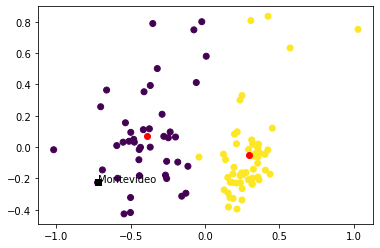

In [16]:
import preprocessing
import constants
from test import Test


original_df = preprocessing.load_csv()
df = preprocessing.preprocess(original_df, shouldNormalize=True)
test = Test()
test.PCA_graph(df,original_df,dimensions=2,number_of_clusters=2)

Analizando estos resultados se ve con claridad que existen puntos que aparentan pertenecer a distintos clusters. En particular, existe un conjunto de datos del lado izquierdo que parecen estar altamente relacionados, lo cual el algoritmo logra captar agrupando a todos. Por otro lado, se agrupa en otro cluster a ciudades que parecen estar relacionadas (aunque no tanto como en el conjunto antes mencionado), además de agrupar a datos que parecerían ser ruidosos. Esto parece indicar que el algoritmo logra cumplir con su objetivo, al igual que da a conocer propiedades difíciles de ver a simple vista.

#3.3.2 PCA 3D

Se analiza adicionalmente la versión tridimensional de PCA, la cual tiene la ventaja de la bidimensional en cuanto a su fácil visualización además de la menor pérdida de información.

In [ ]:
import preprocessing
import constants
from test import Test


original_df = preprocessing.load_csv()
df = preprocessing.preprocess(original_df, shouldNormalize=True)
test = Test()
for  cluster_k in [2,4]:
    test.PCA_graph(df,original_df,dimensions=3,number_of_clusters=cluster_k)

In [ ]:
import preprocessing
import constants
from test import Test


original_df = preprocessing.load_csv()
df = preprocessing.preprocess(original_df, shouldNormalize=True)
test = Test()

Al estudiar los datos en tres dimensiones no parece haber mucha diferencia, 

## 4 Conclusiones

## 4.1 Resultados según expectativas iniciales
 Joya